# Machine learning - penguin classification

This notebook moves through a machine learning process, demonstrating the generic steps. More specifically, this notebook builds a classification model for penguin species.

## Imports

*Stuff that you need.*

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Data sourcing

*Loading the data.*

This notebook uses the [Palmer penguins](https://allisonhorst.github.io/palmerpenguins/) dataset.

In [3]:
penguins = pd.read_csv("./data/penguins.csv")

## Data cleaning

*Fixing any **problems** in the data.*

In [4]:
print("I've done this for you this time; you're welcome.")

I've done this for you this time; you're welcome.


## Data Exploration

*Understanding the data.*

In [5]:
penguins.sample(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
49,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE
18,Adelie,Biscoe,38.2,18.1,185.0,3950.0,MALE
252,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,MALE


<Axes: xlabel='species', ylabel='count'>

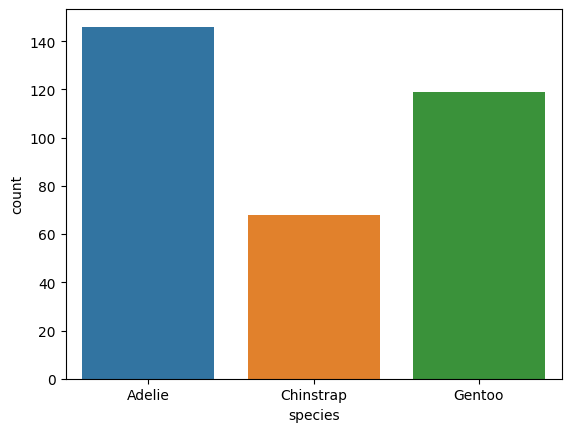

In [6]:
# How many of each species?

sns.countplot(x=penguins["species"])

<Axes: xlabel='sex', ylabel='count'>

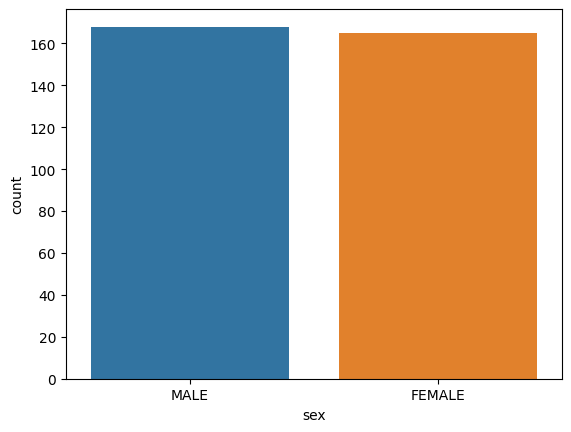

In [8]:
sns.countplot(x=penguins["sex"])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

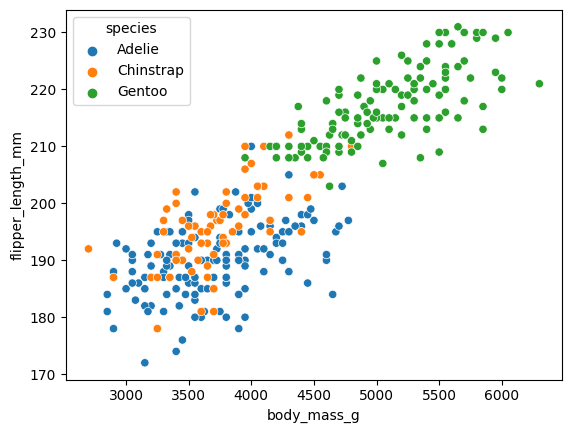

In [7]:
# Interesting relationships

sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

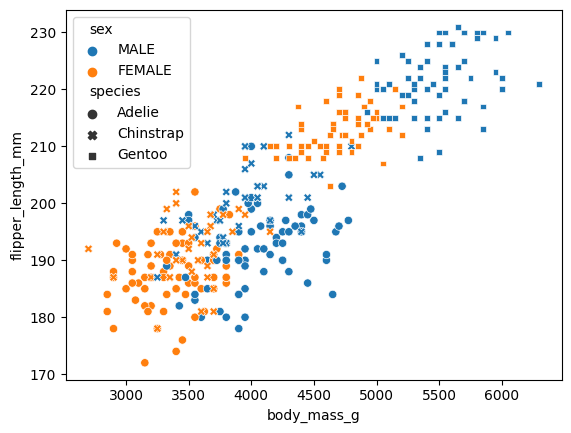

In [9]:
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="sex", style="species")

## Preprocessing

*Changes required to fit into the ML model.*

In [19]:
X = penguins.drop("species", axis=1)
y = penguins["species"]

X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
X = pd.get_dummies(X)
X = X.drop("sex_MALE", axis=1)

X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE
0,39.1,18.7,181.0,3750.0,False,False,True,False
1,39.5,17.4,186.0,3800.0,False,False,True,True
2,40.3,18.0,195.0,3250.0,False,False,True,True
3,36.7,19.3,193.0,3450.0,False,False,True,True
4,39.3,20.6,190.0,3650.0,False,False,True,False
...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,True,False,False,True
329,46.8,14.3,215.0,4850.0,True,False,False,True
330,50.4,15.7,222.0,5750.0,True,False,False,False
331,45.2,14.8,212.0,5200.0,True,False,False,True


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE
0,39.1,18.7,181.0,3750.0,False,False,True,False
1,39.5,17.4,186.0,3800.0,False,False,True,True
2,40.3,18.0,195.0,3250.0,False,False,True,True
3,36.7,19.3,193.0,3450.0,False,False,True,True
4,39.3,20.6,190.0,3650.0,False,False,True,False
...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,True,False,False,True
329,46.8,14.3,215.0,4850.0,True,False,False,True
330,50.4,15.7,222.0,5750.0,True,False,False,False
331,45.2,14.8,212.0,5200.0,True,False,False,True


## Modelling

*Training the model (the actual ML bit).*

In [30]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model.predict(X_test)

y_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Chinstrap'], dtype=object)

In [36]:
y_test

79        Adelie
274       Gentoo
94        Adelie
180    Chinstrap
261       Gentoo
         ...    
16        Adelie
174    Chinstrap
24        Adelie
200    Chinstrap
179    Chinstrap
Name: species, Length: 67, dtype: object

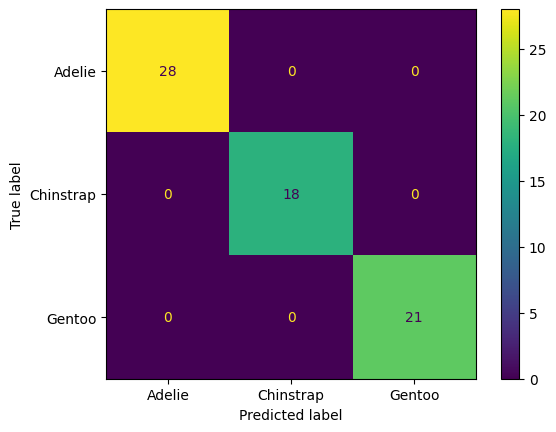

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

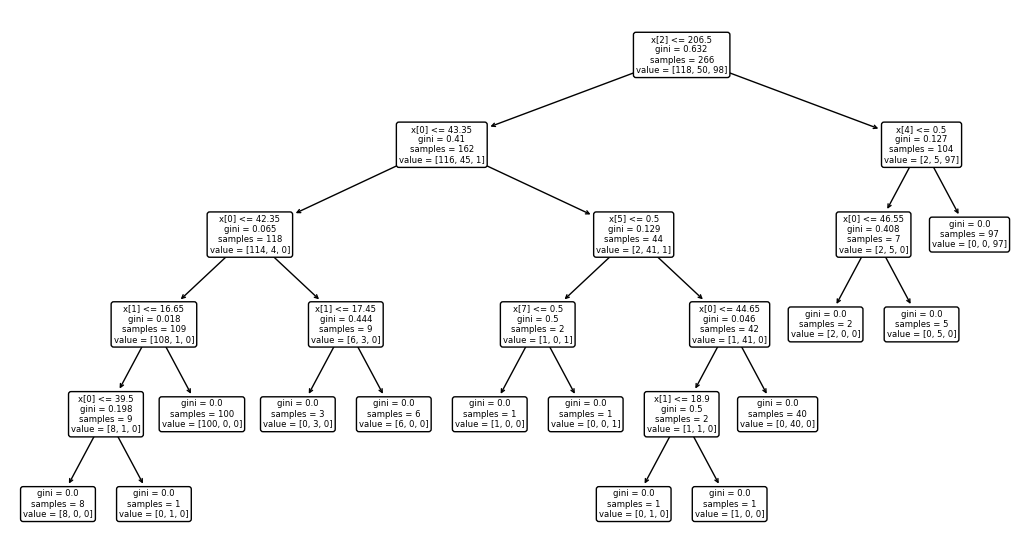

In [46]:
plt.figure(figsize=(13,7))
plot_tree(model, rounded=True);

## Evaluation

*Is the model any good?*